# Traditional Dense NN

In [287]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.noise import GaussianDropout
from keras import *
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

In [288]:
loaded = np.load('/home/alvin/Desktop/2d_ising_nn/data/data.npz')
training_inputs = loaded['a']
training_results = loaded['b']
temp = loaded['c']
magnetization = loaded['d']

In [289]:
l = int( np.sqrt(training_inputs.shape[1]) )

In [290]:
net = Sequential()
#try network with input x 150 x 2
net.add(Dense(100, input_shape = (l*l,), activation = 'relu'))
#net.add(GaussianDropout(0.1))
#net.add(Dense(50, activation = 'relu'))
net.add(Dense(2,activation='softmax'))
net.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=0.05), metrics=['categorical_accuracy'])

In [291]:
# epochs = 100
# cost = np.zeros(epochs)
# for i in range(epochs):
#     cost[i] = net.train_on_batch(training_data,training_results)[0]

In [292]:
history=net.fit(training_inputs,training_results,batch_size=100,
                epochs=200,validation_split=0.1,verbose =0)

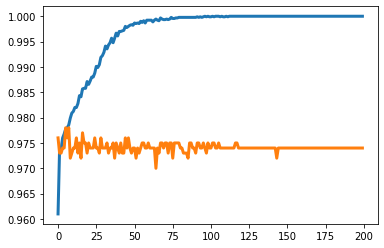

In [293]:
fig=plt.figure()
plt.plot(history.history['categorical_accuracy'], linewidth=3)
plt.plot(history.history['val_categorical_accuracy'], linewidth=3)
plt.show()

In [294]:
get_layer_output = K.function(inputs = net.layers[0].input, outputs = net.layers[-1].output)
output = get_layer_output(training_inputs)

In [295]:
net_output_temp = []
for i in range(len(output)):
    net_output_temp.append((output[i][0],output[i][1],temp[i]))

In [296]:
sorted_output = sorted(net_output_temp, key = lambda x: x[2])
ferro_neuron_output, para_neuron_output, output_temp = zip(*sorted_output)

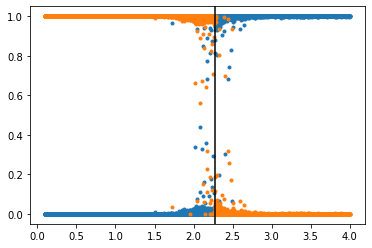

In [298]:
tc = 2/np.log(1+np.sqrt(2))
plt.plot(output_temp,ferro_neuron_output,'.')
plt.plot(output_temp,para_neuron_output,'.')
ax = plt.gca()
ax.axvline(tc,c='k')
plt.show()